# Drum model curve fit

- https://docs.scipy.org/doc/scipy/reference/optimize.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [11]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import IPython.display as ipd
from lib.utils import *

from scipy.optimize import curve_fit

In [65]:
# exponential fit?
def func_exp (x, a, b, c):
    return a * np.exp(-b * x) + c

def func_lin (x, a, b):
    return a*x + b

Define the data to be fit with some noise:

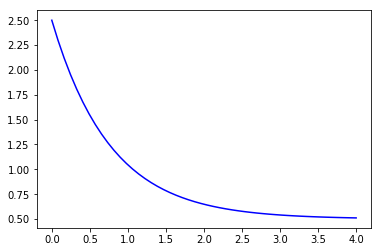

In [26]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y #+ y_noise
plt.plot(xdata, ydata, 'b-', label='data')

Fit for the parameters a, b, c of the function func:

In [5]:
popt, pcov = curve_fit(func, xdata, ydata)
popt

array([2.55423706, 1.35190947, 0.47450618])

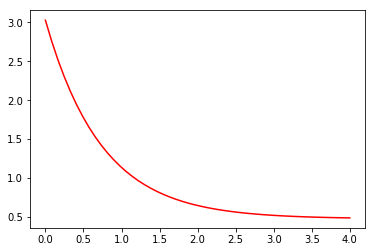

In [6]:
plt.plot(xdata, func(xdata, *popt), 'r-',
    label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

Constrain the optimization to the region of `0 <= a <= 3`, `0 <= b <= 1` and `0 <= c <= 0.5`:

In [7]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt

array([2.43708906, 1.        , 0.35015434])

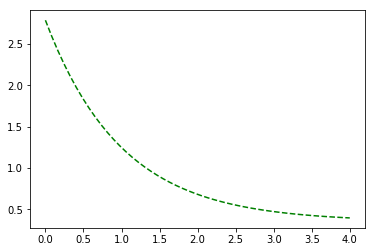

In [8]:
plt.plot(xdata, func(xdata, *popt), 'g--',
    label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

---

In [63]:
model = pd2model (indianDrumModels[0])
model = model[0:20]
modelX = model['Frequency']
modelY = model['Gain']

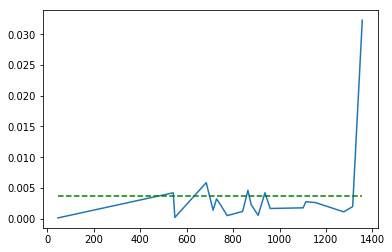

In [64]:
popt, pcov = curve_fit (func_exp, modelX, modelY)
plt.plot (modelX, modelY)
plt.plot (modelX, func_exp (modelX, *popt), 'g--')

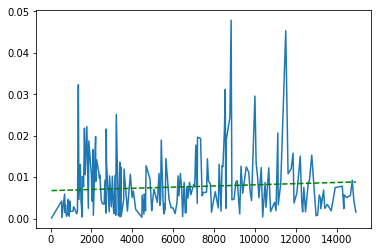

In [58]:
popt, pcov = curve_fit (func_lin, modelX, modelY)
plt.plot (modelX, modelY)                                                                                                       
plt.plot (modelX, func_lin (modelX, *popt), 'g--')